# Loan Default Prediction Algorithm

## Steps in CRISP-DM (Cross Industry Standard Process for Data Minning )

Step 1: Understand the Business Objective/Question <br>
Step 2: Data Understanding <br>
Step 3: Data Preperation <br>
Step 4: Modeling <br>
Step 5: Evaluation <br>
Step 6: Deployment <br>

# Step 1: Understand the Business Question

The Business question that this project seeks to answer is whether a individual that has a loan will default and the probability that the individual may default.

## Special Business Use Case

Know the probability that a bank customer has of defaulting can be helpful to bankers when trying to set interest rates, because they will have a better idea of the risk involved with writing loans to each individual customer.

# Step 2: Data Understanding

The following are the variables in our dataset that we must deploy in our classifcation model

## **Data Dictionary**
<br>
### **Dependent Variable**
<font color="blue">**Loan Status:**</font> **Categorical variable**<br> that expresses if the loan was paid back or defaulted <br>
<br>
### **Independent Variables**
<font color="blue">**Current Loan Amount:**</font> **Numeric variable**<br> that represents the amount of the loan that was paid of fully or defaulted <br>
<font color="blue">**Term:**</font> **Categorical variable**<br> indicating the length of the loan <br>
<font color="blue">**Credit Score:**</font> **Numeric variable**<br> representing the riskiness of the customer <br>
<font color="blue">**Years in current job:**</font> **Ordinal variable**<br> that represents the amount of time the customer has spent in their current job <br>
<font color="blue">**Home Ownership:**</font> **Categorical variable**<br> that indicates whether the customer rents, has a mortgage or completely owns their home<br>
<font color="blue">**Annual Income:**</font> **Numeric variable**<br> representing the annual income of the customer <br>
<font color="blue">**Purpose:**</font> **Categorical variable**<br> representing why the customer wants the loan <br>
<font color="blue">**Monthly Debt :**</font> **Numeric variable**<br> representing monthly debt of the customer <br>
<font color="blue">**Years of Credit History:**</font> **Numeric variable**<br> representing years since the first entry into the customer’s credit history <br>
<font color="blue">**Months since last delinquent:**</font> **Numeric variable**<br> representing time since the customers last loan delinquent payment <br>
<font color="blue">**Number of Open Accounts:**</font> **Numeric variable**<br> representing the number of credit cards the customer currently has <br>
<font color="blue">**Number of Credit Problems:**</font> **Numeric variable**<br> representing the number of credit problems in the customer's history <br>
<font color="blue">**Current Credit Balance:**</font> **Numeric variable**<br> representing the current total debt of the customer <br>
<font color="blue">**Maximum Open Credit:**</font> **Numeric variable**<br> representing the max credit from all credit sources that the customer has<br>
<font color="blue">**Bankruptcies:**</font> **Numeric variable**<br> representing the number of bankruptcies of customer <br>
<font color="blue">**Tax Liens:**</font> **Numeric variable**<br> representing the number of Tax Liens of customer <br>
<br>
<br>
### **Descriptive Variables**
<font color="blue">**Loan ID:**</font> Used to identify a specific loan; each is unique<br>
<font color="blue">**Customer ID:**</font> Used to identify a specific customer; may occur multiple times for multiple loans<br>

# Step 3: Data Preperation 

## Begin by Downloading necessary libraries and reading necessary files into Data frames

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('LoansTrainingSet.csv')


C:\Users\smont\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

## Step 3a Clean the Data 

## Remove Outliers 

### Credit Score Outliers

Credit Score should be between 0-900

In [3]:
# Check for numbers outside the range 0-900
dfover=[]
for row in df['Credit Score']:
    if row>900:
        dfover.append(row)
dfover[:10]

[6640.0,
 7320.0,
 7180.0,
 6670.0,
 7270.0,
 7070.0,
 7370.0,
 7060.0,
 7410.0,
 7330.0]

It appears that all the outliers have been entered with an extra 0. To fix this we will create a loop to remove the extra 0

In [4]:
# Remove Outliers outside of range 0-800 
realnums=[]
for row in df['Credit Score']:
    if row>900:
        real=row/10
        realnums.append(real)
    else:
        realnums.append(row)

df['Credit Score']=realnums
df['Credit Score'].max()

751.0

### Current Loan Amount Outliers

plot the Current loan amount column as a histogram to check for outliers

(array([ 221774.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   35210.]),
 array([  5.05000000e+02,   1.00004544e+07,   2.00004038e+07,
          3.00003532e+07,   4.00003026e+07,   5.00002520e+07,
          6.00002014e+07,   7.00001508e+07,   8.00001002e+07,
          9.00000496e+07,   9.99999990e+07]),
 <a list of 10 Patch objects>)

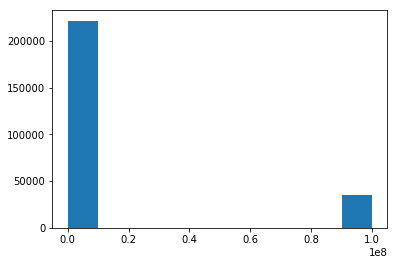

In [5]:
plt.hist(df['Current Loan Amount'])

Another way to check for outliers is to look at the mean vs median

In [6]:
print df['Current Loan Amount'].mean()
print df['Current Loan Amount'].median()

13713306.2602
14298.0


when the mean is much larger than the median it indicates that the data is skwed right 

Now lets look at what and where the outliers are

In [7]:
greater_than_mean = df['Current Loan Amount'] > df['Current Loan Amount'].mean()
df[greater_than_mean].head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,$582.84,26.8,NaN,11,0,8880,22711,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,Debt Consolidation,$984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745.0,10+ years,Rent,39476.0,other,$483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724.0,1 year,Own Home,34297.0,Home Improvements,$777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750.0,10+ years,Own Home,86785.0,Other,$56.41,22.0,NaN,7,0,3959,63862,0.0,0.0


Now lets repace the wrong numbers with the median value

In [8]:
median=df['Current Loan Amount'].median()
quantile95 = df['Current Loan Amount'].quantile(.95)
df['Current Loan Amount']=df['Current Loan Amount'].map(lambda x: median if x>=quantile95 else x)

Now lets look at the distibution again 

(array([  1.99790000e+04,   4.65410000e+04,   5.14790000e+04,
          6.91540000e+04,   2.78380000e+04,   1.60990000e+04,
          1.05200000e+04,   6.61100000e+03,   8.76000000e+03,
          3.00000000e+00]),
 array([   505. ,   4554.5,   8604. ,  12653.5,  16703. ,  20752.5,
         24802. ,  28851.5,  32901. ,  36950.5,  41000. ]),
 <a list of 10 Patch objects>)

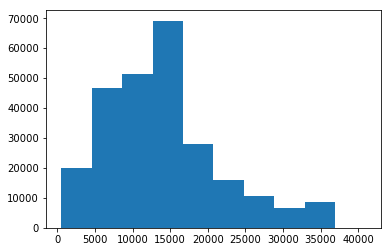

In [9]:
plt.hist(df['Current Loan Amount'])

### Duplicates

check for duplicate customer ID's and Loan ID's

In [10]:
# All loans Id's are unique so there should be no duplicates

print 'there should be', len(df['Loan ID']), 'but there are only', df['Loan ID'].nunique()

there should be 256984 but there are only 215700


We must find and get rid of the duplicates while keeping the relavent data

In [11]:
df=df.groupby(df['Loan ID']).max()

In [12]:
# Check to see if customers have taken out multiple loans by checking for duplicate Customer ID's

print  len(df['Loan ID']), 'should be equal to', df['Loan ID'].nunique() , 'if there are no duplicates'

215700 should be equal to 215700 if there are no duplicates


There are no duplicate Customer ID's so we can move on to filling in the null values

## Fill in the null values for
   1) Months since last delinquent<br>
   2) Bankruptcies<br>
   3) Tax Liens<br>

### Months since last delinquent null Values

Check to see if There are 0 values otherwise nan may indicate no past history or 0 delinquent payments

In [13]:
for row in df['Months since last delinquent']:
    if row==0:
        print 'We have a 0'
        break

We have a 0


Look at where there are 0s in the Months since last delinquent column for patterns 

In [14]:
indexlist=[]
s=0
for row in df['Months since last delinquent']:
    if row==0:
        indexlist.append(s)
    s+=1

df.ix[indexlist].head(5)

C:\Users\smont\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,,,
001eb42c-2b5b-4640-bf9d-8c086a1076f4,001eb42c-2b5b-4640-bf9d-8c086a1076f4,9377bba7-2cab-4478-91c2-a3ff2904638d,Fully Paid,12128.0,Short Term,747.0,7 years,Home Mortgage,90963.0,Debt Consolidation,$123.56,24.1,0.0,6,0,4406,28795,NaN,0.0
002dc37f-f6b5-4113-8d5c-53c25ac6111e,002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,Fully Paid,5006.0,Short Term,749.0,< 1 year,Own Home,45054.0,Debt Consolidation,$42.05,25.0,0.0,5,0,1785,0,NaN,NaN
003a3241-adbe-4337-b73a-5085c6834a74,003a3241-adbe-4337-b73a-5085c6834a74,08117601-9319-41e3-9fa6-6da917c70fa5,Charged Off,7253.0,Short Term,744.0,< 1 year,Rent,45329.0,Debt Consolidation,$30.22,15.9,0.0,4,0,3356,10968,NaN,0.0
00603463-baa7-403d-ae74-752eee57d711,00603463-baa7-403d-ae74-752eee57d711,45fbec08-da53-44c1-a196-be3c6e794028,Fully Paid,8301.0,Short Term,747.0,9 years,Home Mortgage,49157.0,other,$405.13,35.8,0.0,14,0,7769,45432,NaN,0.0
00f848f9-0122-42a8-9386-88e28ecc9408,00f848f9-0122-42a8-9386-88e28ecc9408,2a326063-9fcf-40fa-af0f-a9339c6de96b,Fully Paid,6918.0,Short Term,740.0,10+ years,Own Home,96853.0,Debt Consolidation,"$2,146.91",41.2,0.0,13,0,12352,34598,0.0,0.0


We can also look at the null values to see if there are a lot of credit Problems

In [15]:
indexlist=[]
s=0
for row in df['Months since last delinquent']:
    if pd.isnull(row):
        indexlist.append(s)
    s+=1

df.ix[indexlist].head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,,,
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441.0,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029.0,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743.0,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731.0,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
0000a149-b055-4a57-b762-280783ccc25e,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208.0,Short Term,716.0,10+ years,Rent,41853.0,Business Loan,$561.52,13.2,NaN,4,1,2289,4671,1.0,0.0


Looking at the Number in the column Credit Problems we see that they are mostly 0 so we can assume that 0 and null means that the customer has no past delinquent payments, because he has no Credit Problems.

Now to convert the null values to 0 and leave the current 0s alone would not make sense, because it would indicate that the individual just had a delinquent payment so we must convert the variable into a categorical variable then convert the null and 0 values into a separate string

In [16]:
# convert int months into categorical variables 
# convert NaN values into category 'no past history'

# create bins out of the different time periods and store each instance in new list
newlist=[]
for row in df['Months since last delinquent']:
    if 0<row<=12:
        n = 'less than a year'
        newlist.append(n)
    elif row>12 and row<=24:
        n = 'Over a year'
        newlist.append(n)
    elif row>24 and row<=36:
        n = 'Over two years'
        newlist.append(n)
    elif row>36:
        n = 'Over three years'
        newlist.append(n)
    else:
        n= 'no past history'
        newlist.append(n)

# assign new list to the column 
df['Months since last delinquent']=newlist



### Tax Liens null Values

Find the number of null values in the tax Liens column 

In [17]:
df['Tax Liens'].isnull().sum()

22

Because there are only a few null values fill in the Null Values with the mode 

In [18]:
TaxLiens_mode=df['Tax Liens'].mode()

print TaxLiens_mode

df['Tax Liens'].fillna(0,inplace=True)

0    0.0
dtype: float64


### Bankruptcies null Values

Find the number of null values in the Bankruptcies column 

In [19]:
df['Tax Liens'].isnull().sum()

0

Because there are only a few null values fill in the Null Values with the mode 

In [20]:
Bankruptcies_mode=df['Bankruptcies'].mode()

print Bankruptcies_mode

df['Bankruptcies'].fillna(0,inplace=True)

0    0.0
dtype: float64


## Data Cleaning and Preprocessing 
   1) Monthly Debt<br>
   2) Purpouse<br>
   3) Maximum Open Credit<br>

### Monthly Debt

Convert Montly Debt column from an object to an int variable

In [21]:
# loop stores charachters with ascii values between 0 and 9 in a list then assigns that list to the column Monthly Debt 
debtlist=[]
for row in df['Monthly Debt']:
    row=str(row)
    numlist=[]
    for nums in row:
        if nums>='0':
            if nums<='9':
                numlist.append(nums)
    numlist=numlist[0:-2]
    numlist="".join(numlist)
    numlist=int(numlist)
    debtlist.append(numlist)

df['Monthly Debt']=debtlist

### Purpouse 

Check to ensure there are no duplicates in the purpouse column 

In [22]:
# looks at all the unique values in the purpouse column 
print df['Purpose'].unique()

['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


We see an error in that there are to instances of other each spelled differently. This must be fixed or else the algorithm will see these two instances of other as separate categorical variables. 

In [23]:
# function converts all instances of other into Other
df['Purpose']=df['Purpose'].map(lambda x: 'Other' if x=='other' else x)
print df['Purpose'].unique()

['Debt Consolidation' 'Other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215700 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 to ffffe32e-ed17-459f-9cfd-7b9ee7972933
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Current Loan Amount             215700 non-null float64
Term                            215700 non-null object
Credit Score                    171202 non-null float64
Years in current job            215700 non-null object
Home Ownership                  215700 non-null object
Annual Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null int64
Years of Credit History         215700 non-null float64
Months since last delinquent    215700 non-null object
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Cur

In [25]:
df.ix[154841]

Loan ID                         b798f46b-e27b-4823-af83-294b1ffc3490
Customer ID                     f61890c5-e264-4b0f-a047-9cfa03b9d182
Loan Status                                              Charged Off
Current Loan Amount                                             1470
Term                                                      Short Term
Credit Score                                                     725
Years in current job                                         2 years
Home Ownership                                                  Rent
Annual Income                                                  39200
Purpose                                           Debt Consolidation
Monthly Debt                                                     506
Years of Credit History                                         15.3
Months since last delinquent                          Over two years
Number of Open Accounts                                            3
Number of Credit Problems         

### Maximum Open Credit

First we must convert all the non integer values into intgers 

In [26]:
# convert object variables into int variables
s=0
indexlist=[]
for row in df['Maximum Open Credit']:  
    try:
        int(row)
    except ValueError:
        indexlist.append(s)
    s+=1

    
df['Maximum Open Credit'][indexlist]=0
df['Maximum Open Credit']=df['Maximum Open Credit'].apply(lambda x: int(x))

C:\Users\smont\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [27]:
df.ix[154841]

Loan ID                         b798f46b-e27b-4823-af83-294b1ffc3490
Customer ID                     f61890c5-e264-4b0f-a047-9cfa03b9d182
Loan Status                                              Charged Off
Current Loan Amount                                             1470
Term                                                      Short Term
Credit Score                                                     725
Years in current job                                         2 years
Home Ownership                                                  Rent
Annual Income                                                  39200
Purpose                                           Debt Consolidation
Monthly Debt                                                     506
Years of Credit History                                         15.3
Months since last delinquent                          Over two years
Number of Open Accounts                                            3
Number of Credit Problems         

Now that we have the index of all the non-int values which we gave a value of 0 we are going to fill in these values based of the customers number of Open Accounts

We will use the mean of maximum Open Credit as a value and the Number of Open accounts as the key in a dictionary that will be applied to the 0 values we found above

In [28]:
# find the mean for each instance of Number of open Accounts 
# i.e. what is the mean maximum open credit for all customers with 1 open account
df2=df.drop(df.index[indexlist])
dflist=pd.DataFrame()
dflist=df2.groupby('Number of Open Accounts')['Maximum Open Credit'].mean()
df3=pd.DataFrame(dflist)

In [29]:
len(df)

215700

Now that we have the mean value for each instance of number of open accounts we will store each instance of number of open accounts in a list and combine it with the list of means to create a dictionary

In [30]:
# Store the means and unique values of Number of Open Accounts in a list
Num_of_open_acc=df['Number of Open Accounts'].unique()
Num_of_open_acc.sort()
Max_open_credit_avg=df3['Maximum Open Credit']

# Create the dictionary of Number of Open Accounts as the key and the mean Maximum Open Credit as the value
max_credit_dict = {}

# fill the dictionary 
Num_of_open_acc_and_Max_open_credit = zip(Num_of_open_acc, Max_open_credit_avg)
for Num_of_open_acc, Max_open_credit_avg in Num_of_open_acc_and_Max_open_credit:
    max_credit_dict[Num_of_open_acc] = Max_open_credit_avg    


In [31]:
len(df)

215700

Now that we have the dictionary we will use the dictionary to fill in the values in the index positions we stored in a list above.

In [32]:
# loop iterates through the index list applying the dictionary at each position
for i in indexlist:
    num=df.ix[i]['Number of Open Accounts']
    df.at[i,'Maximum Open Credit']=max_credit_dict[num]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215702 entries, 000025bb-5694-4cff-b17d-192b1a98ba44 to 157242
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Current Loan Amount             215700 non-null float64
Term                            215700 non-null object
Credit Score                    171202 non-null float64
Years in current job            215700 non-null object
Home Ownership                  215700 non-null object
Annual Income                   171202 non-null float64
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    215700 non-null object
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance     

## Predicting Null Values 
   1) Credit Score<br>
   2) Annual Income<br>

### Credit Score null values

We will use a algorithm  to predict the null values for credit score.

First we must find which variables are good predictors of Credit Score by looking at the correlation of other variables

In [34]:
# Looking at Credit Score Correlation
df.corr().ix['Credit Score', :-1]


C:\Users\smont\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


Current Loan Amount         -0.201107
Credit Score                 1.000000
Annual Income                0.014844
Monthly Debt                -0.088166
Years of Credit History      0.085461
Number of Open Accounts     -0.038642
Number of Credit Problems   -0.062030
Current Credit Balance      -0.014965
Maximum Open Credit          0.010204
Bankruptcies                -0.048236
Name: Credit Score, dtype: float64

In [35]:
s=0
indexlist=[]
for row in df['Credit Score']:  
    try:
        int(row)
    except ValueError:
        indexlist.append(s)
    s+=1

x_test=df.iloc[indexlist]
x_test=x_test[['Current Loan Amount','Monthly Debt','Years of Credit History','Current Credit Balance']]

In [36]:
x_test.dropna(inplace=True)

In [37]:
df_train=df.copy()

df_train.dropna(inplace=True)

X_train=df_train[['Current Loan Amount','Monthly Debt','Years of Credit History','Current Credit Balance']]
y_train=df_train[['Credit Score']]

from sklearn import linear_model
from sklearn.linear_model import Ridge

creditreg= linear_model.Ridge()
creditreg.fit(X_train, y_train)

y_pred_credit=creditreg.predict(x_test)

In [38]:
i=0
for index, row in df.iterrows():
    if(pd.isnull(row['Credit Score'])):
        df.at[index,'Credit Score']=y_pred_credit[i]
        i+=1
    

IndexError: index 44498 is out of bounds for axis 0 with size 44498

In [ ]:
# Annual Income null values
df.corr()

In [ ]:
# Annual Income null values

s=0
indexlist=[]
for row in df['Annual Income']:  
    try:
        int(row)
    except ValueError:
        indexlist.append(s)
    s+=1

x_test=df.loc[indexlist]
x_test=x_test[['Current Loan Amount','Monthly Debt','Years of Credit History','Current Credit Balance']]

In [ ]:
df_train=df.copy()

df_train.dropna(inplace=True)

X_train=df_train[['Current Loan Amount','Monthly Debt','Years of Credit History','Current Credit Balance']]
y_train=df_train[['Annual Income']]

from sklearn import linear_model
from sklearn.linear_model import Ridge

incomereg= linear_model.Ridge()
incomereg.fit(X_train, y_train)

y_pred_income=incomereg.predict(x_test)

In [ ]:
i=0
for index, row in df.iterrows():
    if(pd.isnull(row['Annual Income'])):
        df.at[index,'Annual Income']=y_pred_income[i]
        i+=1

In [ ]:
# feature enginering

df['total credit']=df['Current Loan Amount']+df['Current Credit Balance']
df['Coverage_ratio']=df['Annual Income']/(df['Monthly Debt']*12+1)

In [ ]:
# Variable Conversion

df['Months since last delinquent']=df['Months since last delinquent'].astype('category')
df['Years in current job']=df['Years in current job'].astype('category')

In [ ]:
Xy=df.copy()
del Xy['Loan ID']
del Xy['Customer ID']
del Xy['Loan Status']

Xy=pd.get_dummies(Xy,drop_first=True)

In [ ]:
X=Xy
y=df[['Loan Status']]

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42) 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gradient = GradientBoostingClassifier()
ada = AdaBoostClassifier()

In [ ]:
t = tree.fit(X_train, y_train)
f = forest.fit(X_train, y_train)
g = gradient.fit(X_train, y_train)
a = ada.fit(X_train, y_train)

In [ ]:
print(t.score(X_test, y_test))
print(f.score(X_test, y_test))
print(g.score(X_test, y_test))
print(a.score(X_test, y_test))